In [40]:
import kagglehub

path = kagglehub.dataset_download("anandshaw2001/video-game-sales")


In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


path = kagglehub.dataset_download("anandshaw2001/video-game-sales")

In [ ]:
# Loading the Video Game Sales
df = pd.read_csv(f"{'/home/shree/Downloads/archive'}/vgsales.csv")

In [43]:
# Display basic dataset information
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None
   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart W

In [44]:
# Check for missing values
print(df.isnull().sum())

# Ensure only numeric columns are used for correlation
numeric_df = df.select_dtypes(include=[np.number])


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [45]:
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

In [46]:
# Use the numeric columns already present in the dataframe
columns = df.select_dtypes(include=[np.number]).columns

stats = {}

for col in columns:
    stats[col] = {
        'mean': df[col].mean(),
        'median': df[col].median(),
        'mode': df[col].mode().iloc[0] if not df[col].mode().empty else None,
        'variance': df[col].var(),
        'skewness': df[col].skew(),
        'kurtosis': df[col].kurtosis()
    }

stats_df = pd.DataFrame(stats).T
print(stats_df)


                     mean   median     mode      variance   skewness  \
Rank          8300.605254  8300.50     1.00  2.296186e+07   0.000066   
Year          2006.416134  2007.00  2007.00  3.342789e+01  -1.015600   
NA_Sales         0.264667     0.08     0.00  6.669712e-01  18.799627   
EU_Sales         0.146652     0.02     0.00  2.553799e-01  18.875535   
JP_Sales         0.077782     0.00     0.00  9.566070e-02  11.206458   
Other_Sales      0.048063     0.01     0.00  3.556559e-02  24.233923   
Global_Sales     0.537441     0.17     0.02  2.418112e+00  17.400645   

                 kurtosis  
Rank            -1.199865  
Year             1.933773  
NA_Sales       649.130268  
EU_Sales       756.027796  
JP_Sales       194.233994  
Other_Sales   1025.348145  
Global_Sales   603.932346  


In [47]:
# Detect and handle outliers using the IQR method
for col in df.select_dtypes(include=['number']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]


In [48]:
# Standardize categorical values
df = df.apply(lambda x: x.str.lower().str.strip() if x.dtype == "object" else x)


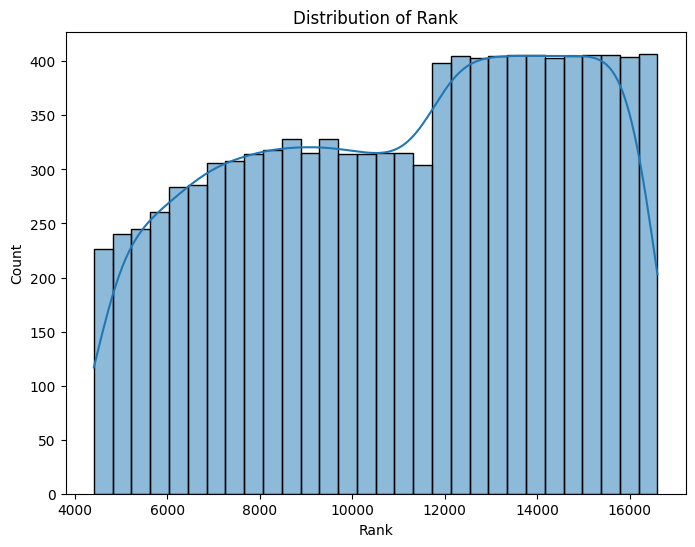

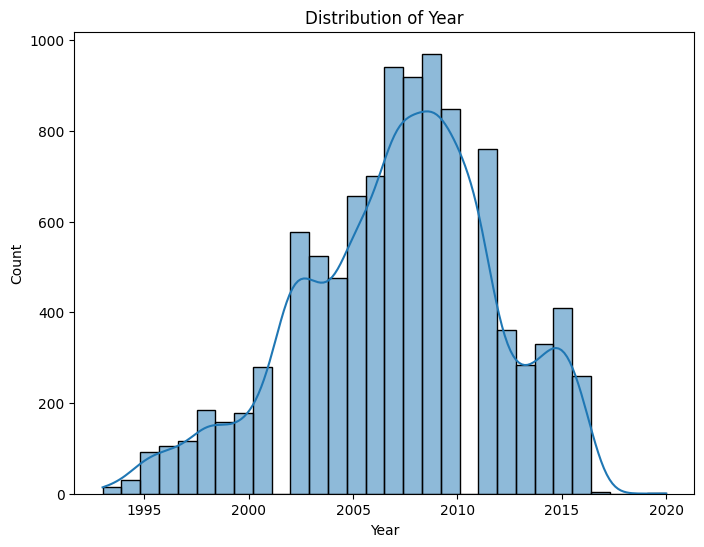

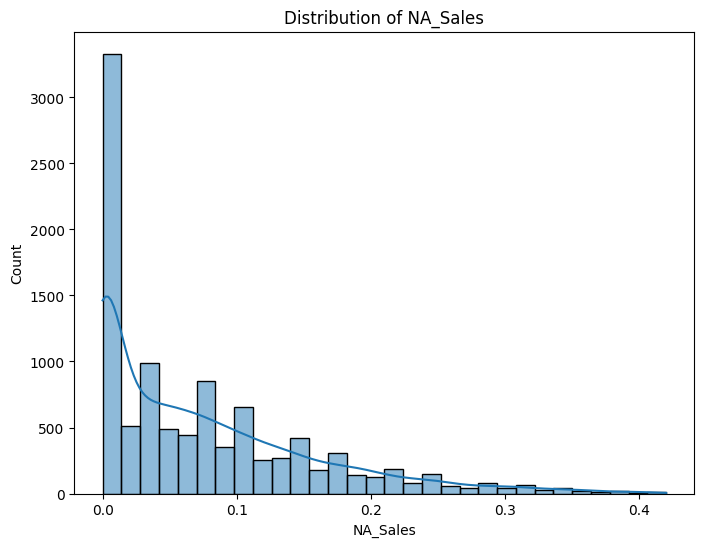

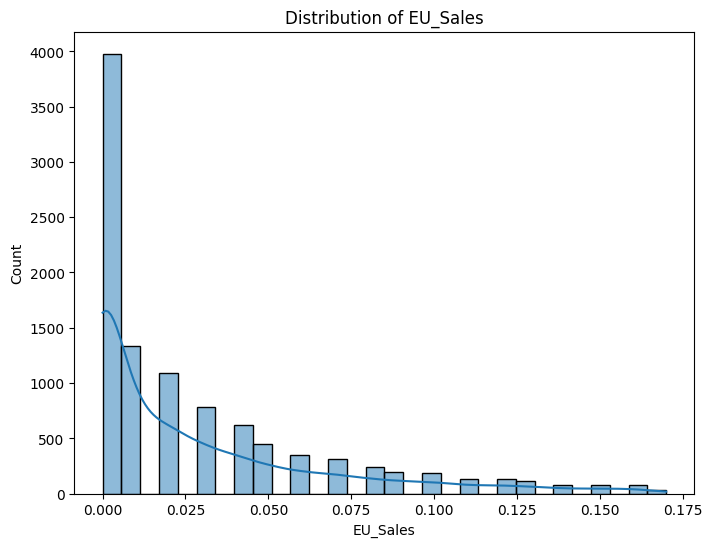

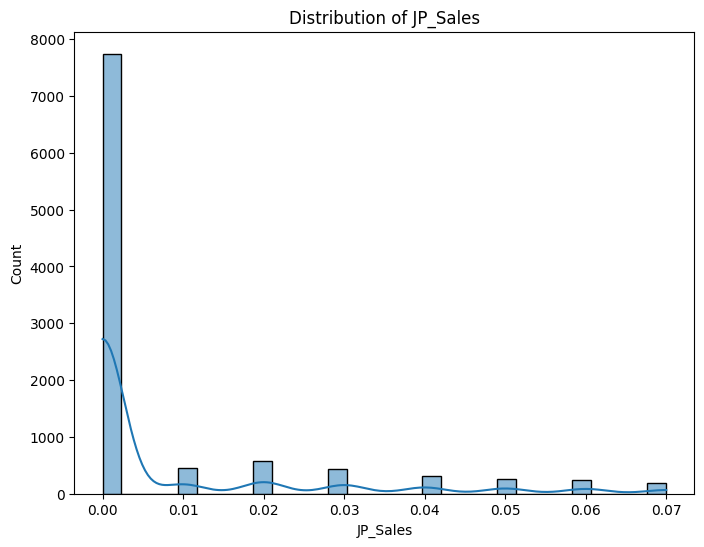

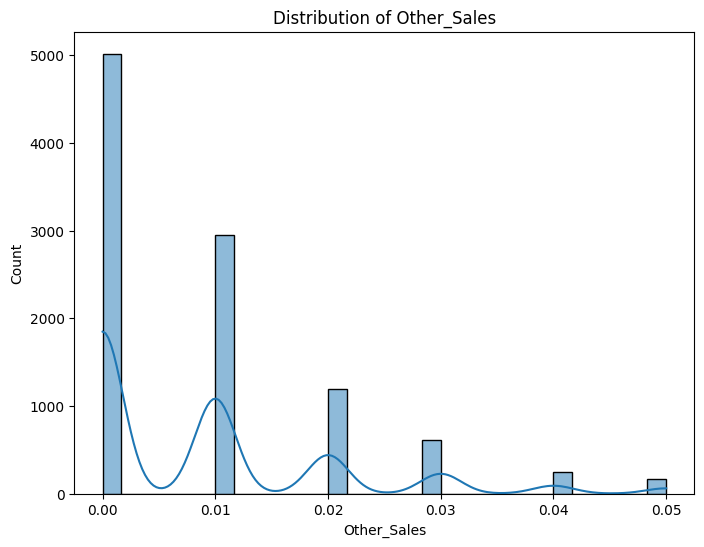

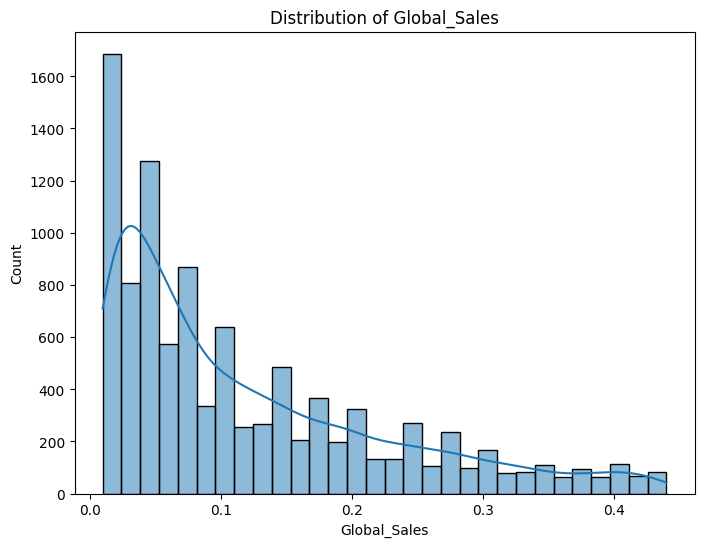

In [49]:
# Univariate Analysis
for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

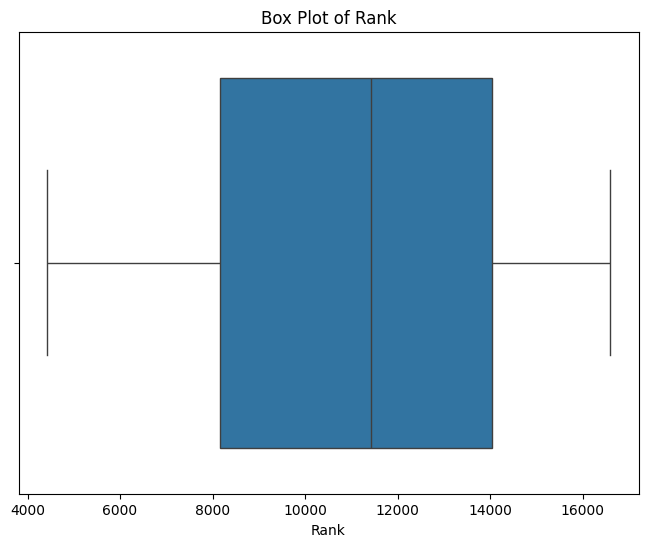

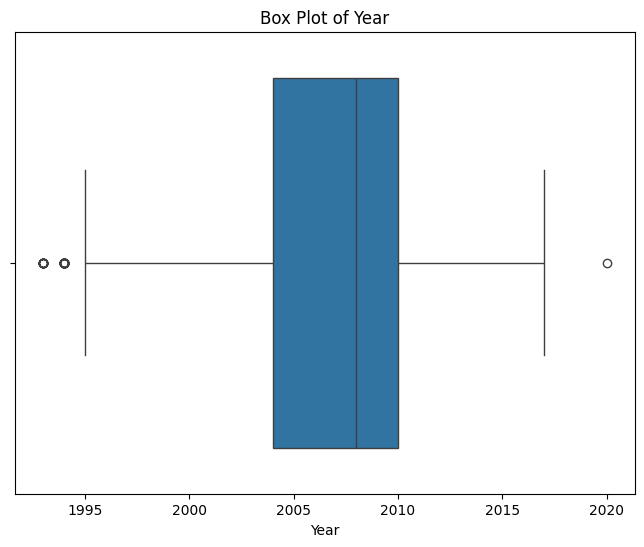

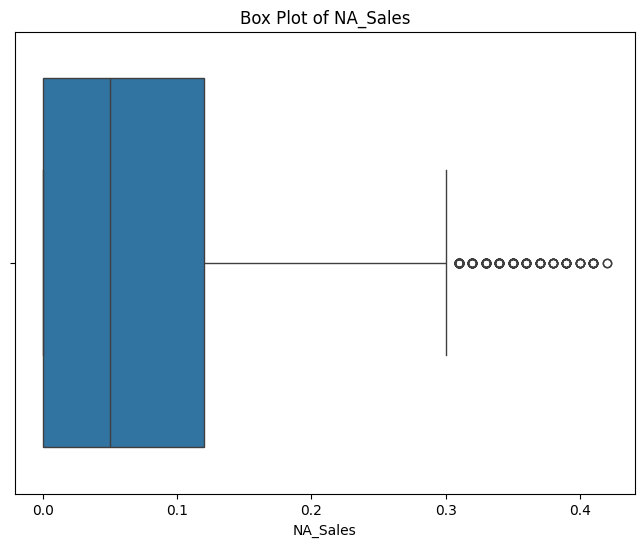

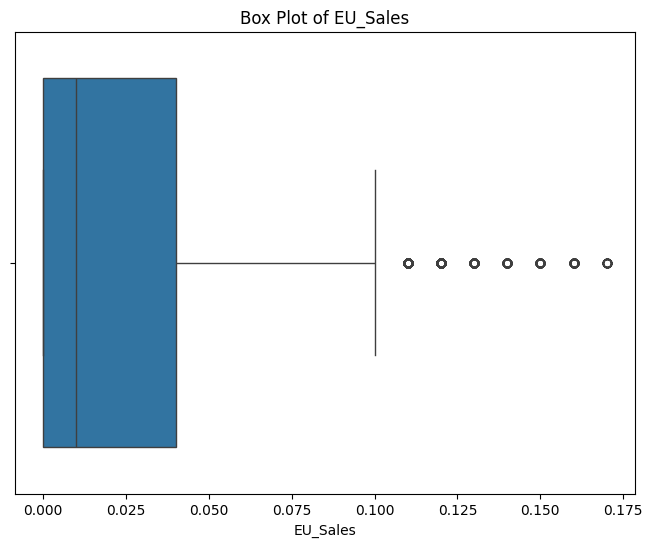

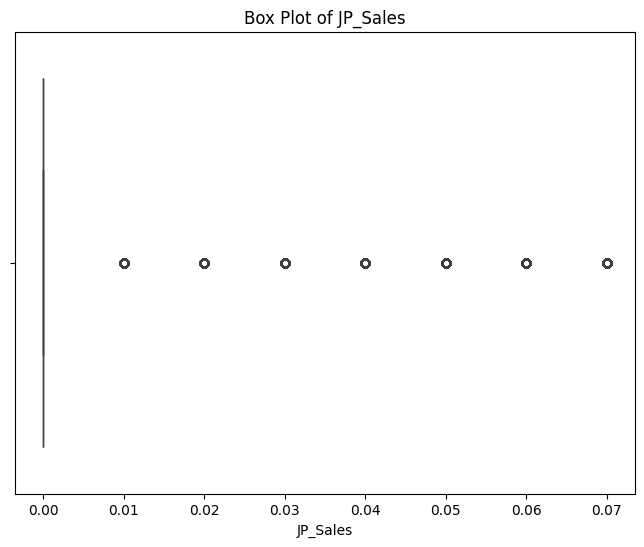

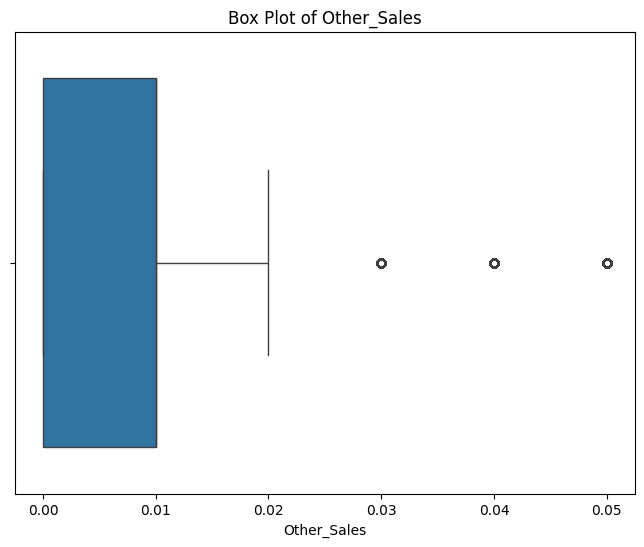

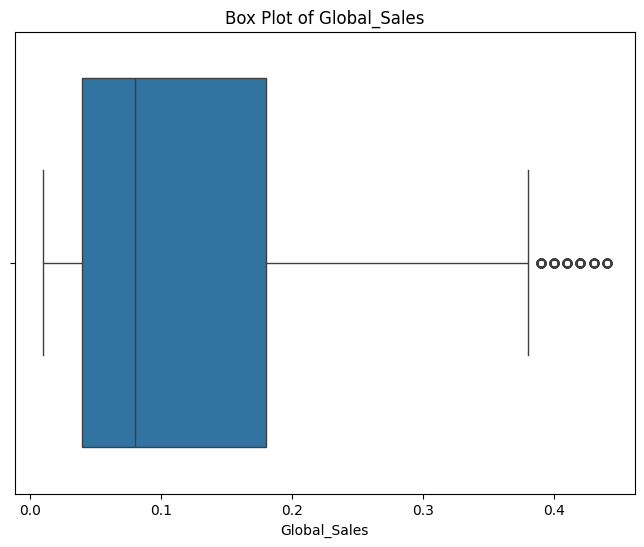

In [50]:
# Box Plots
for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

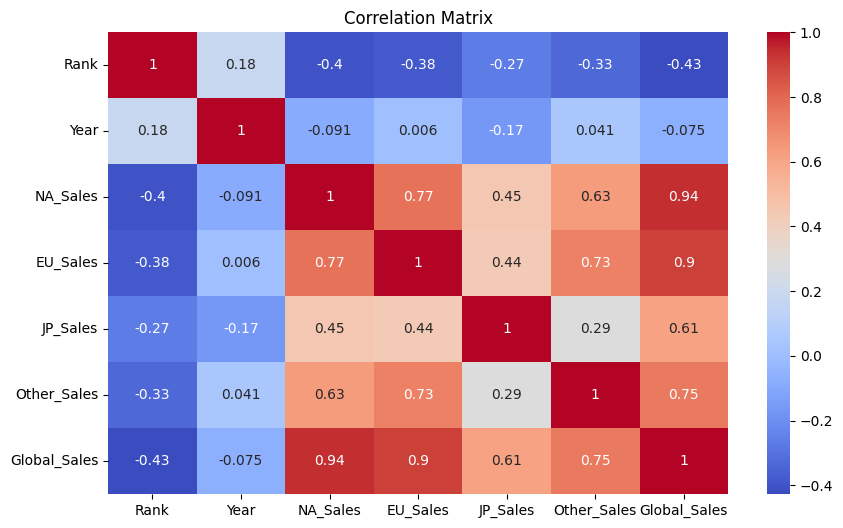

In [51]:
# Bivariate Analysis
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


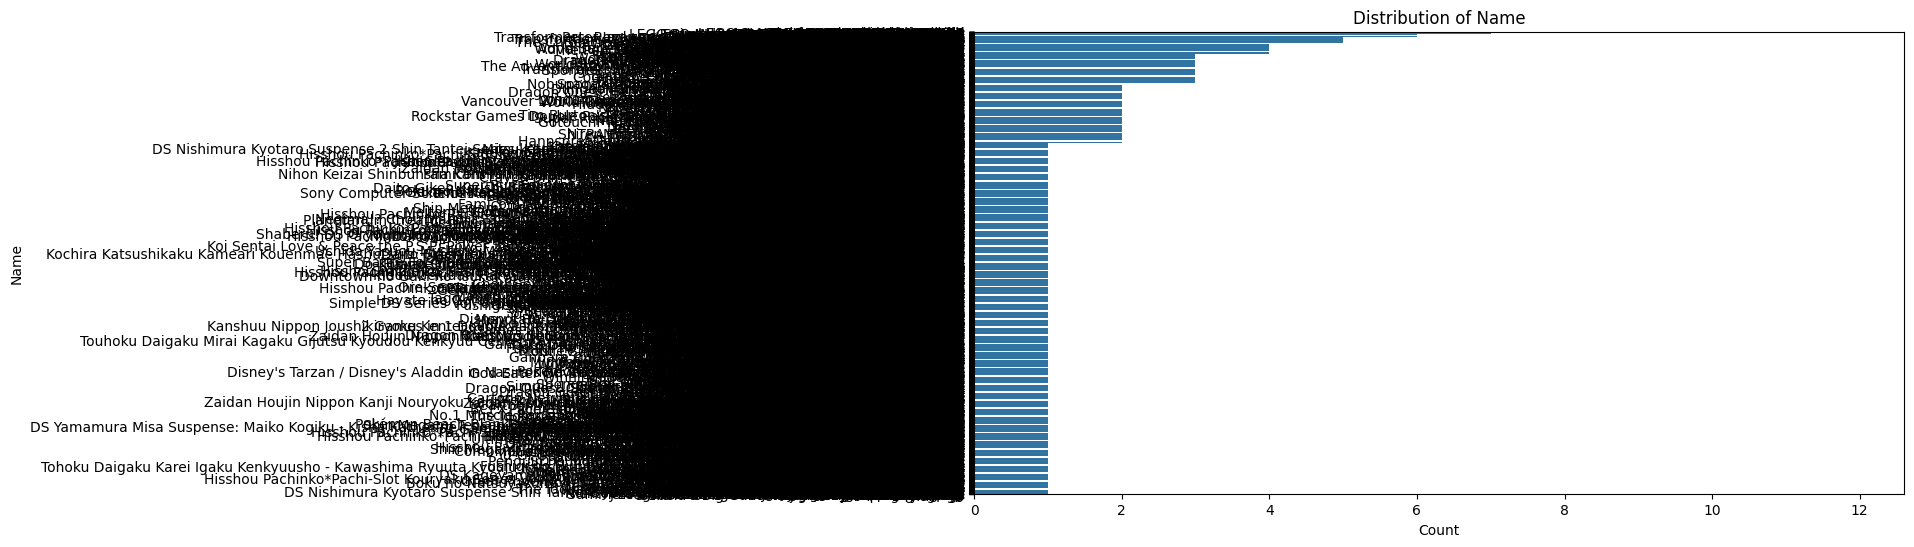

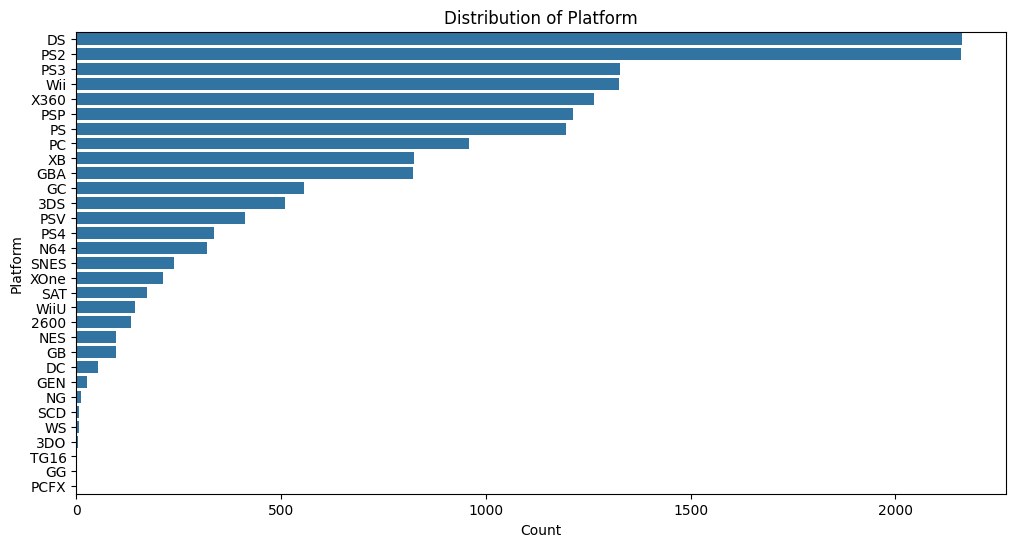

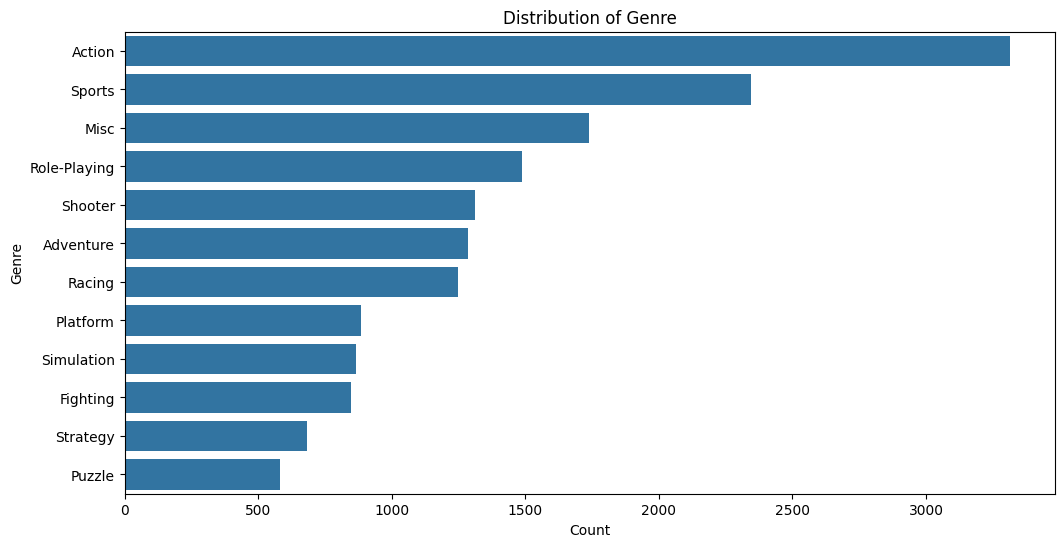

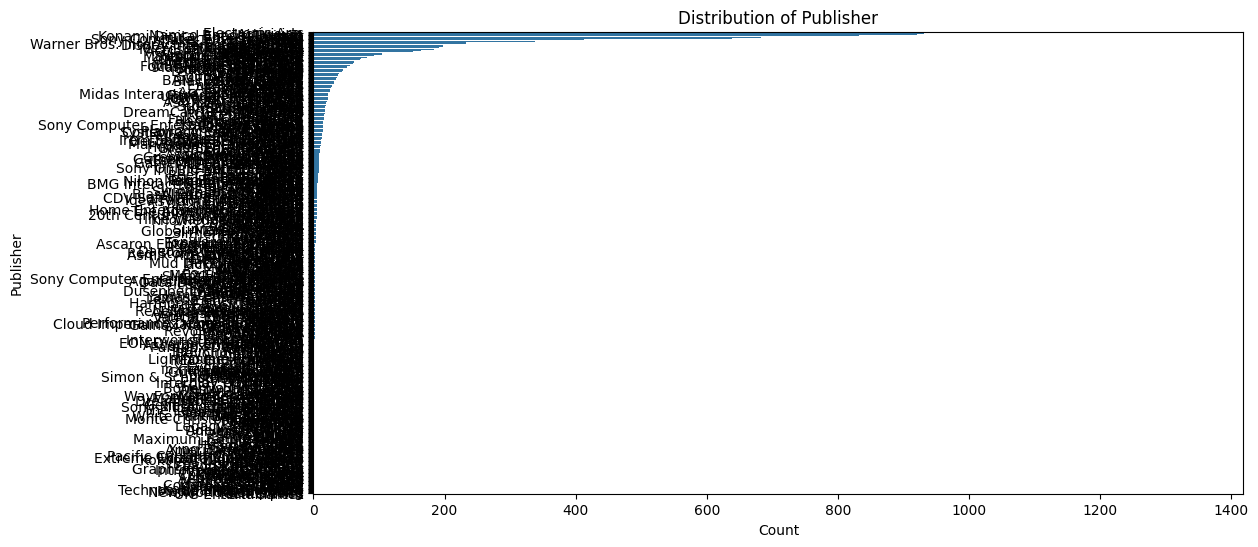

In [53]:
# Bar plot for categorical distributions
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv(f"{'/home/shree/Downloads/archive'}/vgsales.csv")
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Loop through each categorical column to create count plots
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()


In [ ]:
# Save cleaned dataset
df.to_csv('video-game-sales.csv', index=False)

print("Data cleaning and EDA complete.")

Data cleaning and EDA complete.
